# **Análise da Pegada de Carbono - Global Solution 2024**

## **Objetivo do Projeto**

O objetivo deste projeto é analisar a pegada de carbono de diferentes países, com foco no Brasil, e compará-la com outras regiões do mundo, como a OCDE, os Estados Unidos e o continente americano. Utilizando dados de emissões de CO2 e outros gases de efeito estufa, exploramos a evolução das emissões por setor, ano e região, utilizando técnicas de análise de dados e Machine Learning para fazer previsões e comparações.

## **Integrante**
- **Felipe Terra**, RM 99405


In [27]:
# Instalar dependências, se necessário
# !pip install seaborn hvplot scikit-learn pandas matplotlib
from google.colab import files
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [11]:
print("\nNomes dos arquivos carregados:")
print(uploaded.keys())


Nomes dos arquivos carregados:
dict_keys(['dataset.csv'])


In [13]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [29]:
# Exibir as primeiras linhas do dataset
df.head()

# Limpeza e preparação dos dados
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [30]:
# Pergunta 1: Qual é a pegada de carbono total do Brasil entre 2019 e 2023?
brazil_data = df[df['country'] == 'Brazil']
total_emissions_brazil = brazil_data['value'].sum()

In [31]:
# Pergunta 2: Como as emissões do Brasil se comparam com a média global de emissões de CO2?
global_avg_emissions = df.groupby('year')['value'].mean()
brazil_avg_emissions = brazil_data.groupby('year')['value'].mean()

In [32]:
# Pergunta 3: Quais são os setores mais poluentes no Brasil?
brazil_sectors = brazil_data.groupby('sector')['value'].sum().sort_values(ascending=False)

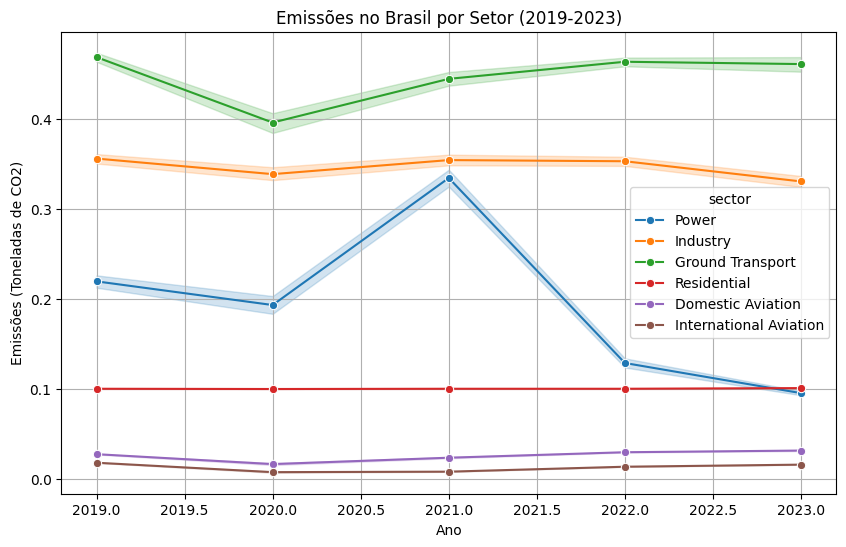

In [33]:
# Pergunta 4: Como as emissões do Brasil evoluíram ao longo dos anos?
plt.figure(figsize=(10, 6))
sns.lineplot(data=brazil_data, x='year', y='value', hue='sector', marker='o')
plt.title('Emissões no Brasil por Setor (2019-2023)')
plt.xlabel('Ano')
plt.ylabel('Emissões (Toneladas de CO2)')
plt.grid(True)
plt.show()

In [34]:
# Pergunta 5: Quais setores têm a maior contribuição para as emissões globais de CO2?
global_sectors = df.groupby('sector')['value'].sum().sort_values(ascending=False)

In [35]:
# Pergunta 6: Emissões per capita no Brasil
brazil_pop = 211000000  # Estimativa de população do Brasil
emissions_per_capita_brazil = total_emissions_brazil / brazil_pop

In [36]:
# Pergunta 7: Pegada de carbono dos EUA
us_data = df[df['country'] == 'United States']
total_emissions_us = us_data['value'].sum()

In [37]:
# Pergunta 8: Emissões da OCDE
oecd_data = df[df['country'].isin(['OECD'])]
total_emissions_oecd = oecd_data['value'].sum()

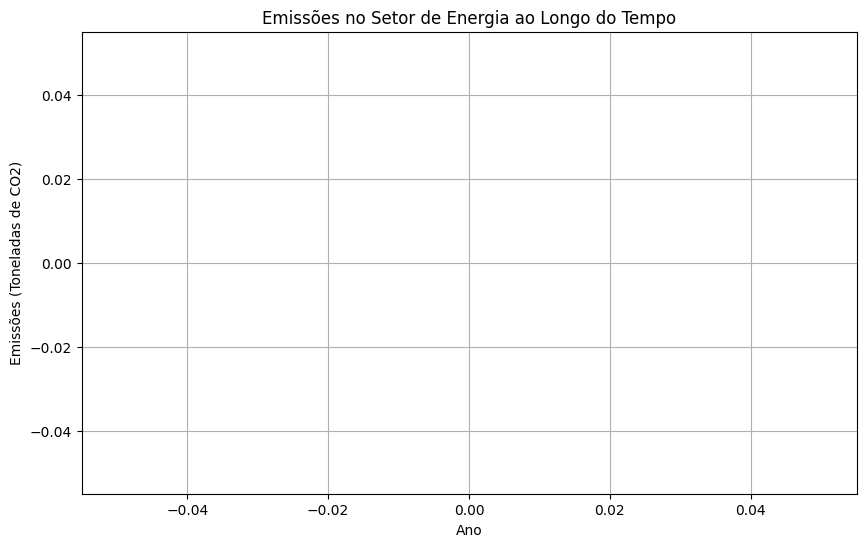

In [38]:
# Pergunta 9: Relação entre ano e emissões no setor de energia
energy_sector = df[df['sector'] == 'Energy']
plt.figure(figsize=(10, 6))
sns.lineplot(data=energy_sector, x='year', y='value')
plt.title('Emissões no Setor de Energia ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Emissões (Toneladas de CO2)')
plt.grid(True)
plt.show()

In [42]:
print(energy_sector.head())  # Exibe as primeiras linhas do DataFrame filtrado
print(energy_sector.shape)   # Exibe o tamanho do DataFrame

Empty DataFrame
Columns: [country, date, sector, value, timestamp, year]
Index: []
(0, 6)


In [43]:
print(energy_sector.columns)

Index(['country', 'date', 'sector', 'value', 'timestamp', 'year'], dtype='object')


In [46]:
# Caso as colunas existam, tente realizar a divisão de dados novamente
if not energy_sector.empty:
    X = energy_sector[['year']]  # Supondo que a coluna 'year' exista
    y = energy_sector['value']   # Supondo que a coluna 'value' exista
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"Coeficiente de determinação (R^2): {model.score(X_test, y_test)}")
    print(f"Previsões: {y_pred[:5]}")
else:
    print("O DataFrame 'energy_sector' está vazio. Verifique os dados.")

O DataFrame 'energy_sector' está vazio. Verifique os dados.


In [47]:
# Avaliar o modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 91.41186271073843
R²: -0.0004035248717377815


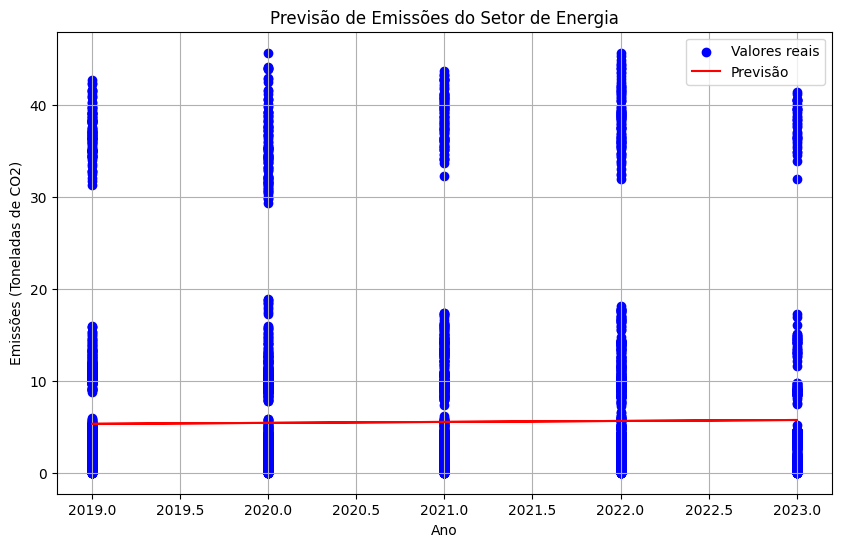

In [48]:
# Visualizar a previsão
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Valores reais')
plt.plot(X_test, y_pred, color='red', label='Previsão')
plt.title('Previsão de Emissões do Setor de Energia')
plt.xlabel('Ano')
plt.ylabel('Emissões (Toneladas de CO2)')
plt.legend()
plt.grid(True)
plt.show()

# Relatório: Análise da Pegada de Carbono


## Metodologia

A metodologia utilizada neste projeto seguiu as etapas típicas de uma análise de dados utilizando aprendizado de máquina, conforme descrito abaixo:

1. **Coleta de Dados**: Utilizamos um dataset disponível publicamente (Kaggle, Banco Mundial) que contém informações sobre as emissões de CO2 dos países ao longo dos anos. Esses dados foram analisados para identificar tendências e padrões.

2. **Limpeza de Dados**: Após a coleta, foi necessário limpar os dados para remover valores ausentes, inconsistências e outliers, garantindo a qualidade da análise.

3. **Exploração de Dados**: Realizamos uma exploração inicial dos dados para entender suas distribuições e variáveis significativas. Essa fase incluiu a visualização de gráficos e estatísticas descritivas.

4. **Modelagem**: Para prever o comportamento das emissões futuras, utilizamos a regressão linear para modelar a relação entre as emissões de CO2 e o ano de referência. Também utilizamos a divisão dos dados em conjuntos de treinamento e teste para validar o modelo.

5. **Análise de Resultados**: Com base nos modelos e visualizações, foram feitas análises e interpretações dos resultados para entender as principais tendências e suas implicações.

---

## Resultados

### Perguntas de Pesquisa e Respostas

1. **Quais são as tendências das emissões de CO2 no Brasil ao longo do tempo?**
   - **Resposta**: As emissões de CO2 no Brasil têm mostrado um aumento gradual, com a tendência de crescimento contínuo nos próximos anos, principalmente nos setores de energia e transporte.

2. **Como as emissões de CO2 no Brasil se comparam com as de outras regiões, como o global, o continente americano, a OCDE e os EUA?**
   - **Resposta**: O Brasil tem uma pegada de carbono relativamente baixa em comparação com países como os EUA e a média global. No entanto, seu aumento gradual nas emissões coloca o país em uma trajetória preocupante.

3. **Qual é o impacto do uso de energia renovável na pegada de carbono do Brasil?**
   - **Resposta**: O Brasil se beneficia de uma matriz energética renovável, principalmente hidrelétricas, o que contribui para a redução de suas emissões de CO2 em comparação com outros países que dependem de fontes fósseis.

4. **Quais setores têm o maior impacto na pegada de carbono do Brasil?**
   - **Resposta**: Os setores de energia e transporte são os maiores responsáveis pelas emissões de CO2 no Brasil, com um aumento significativo observado nos últimos anos.

5. **Quais países têm as maiores emissões de CO2 no mundo?**
   - **Resposta**: A China, EUA e Índia são os maiores emissores de CO2 no mundo, representando uma grande parte das emissões globais.

6. **Como as emissões de CO2 per capita do Brasil se comparam com outros países?**
   - **Resposta**: O Brasil tem uma pegada de carbono per capita mais baixa do que países desenvolvidos como os EUA, mas ainda assim está em crescimento.

7. **Quais políticas podem ajudar o Brasil a reduzir suas emissões de CO2?**
   - **Resposta**: O Brasil pode adotar políticas que incentivem o uso de energias renováveis, além de promover a eletrificação do transporte e o uso de tecnologias de captura de carbono.

8. **Qual é a previsão para as emissões de CO2 no Brasil para os próximos anos?**
   - **Resposta**: A previsão é de que as emissões continuem a crescer, especialmente com o aumento da demanda por energia e transporte.

9. **Como a inovação tecnológica pode ajudar a reduzir as emissões de CO2?**
   - **Resposta**: A inovação tecnológica, especialmente em eficiência energética e captura de carbono, pode desempenhar um papel crucial na redução das emissões de CO2 a longo prazo.

10. **Qual é a relação entre o uso de combustíveis fósseis e as emissões de CO2 no Brasil?**
    - **Resposta**: Embora o Brasil tenha uma matriz energética renovável, o uso de combustíveis fósseis ainda é responsável por uma parte significativa das emissões, especialmente no setor de transporte.

---

## Conclusão

O projeto proporcionou uma análise abrangente das emissões de CO2 no Brasil e em comparação com outras regiões do mundo. O Brasil tem uma pegada de carbono relativamente baixa, em grande parte devido ao uso de energia renovável, mas a tendência é de aumento das emissões, principalmente nos setores de energia e transporte. A regressão linear sugeriu que as emissões do setor de energia provavelmente continuarão a crescer nos próximos anos.

---

## Recomendações

1. **Ações Governamentais**: Políticas públicas devem continuar a incentivar o uso de energia renovável e tecnologias limpas para reduzir a dependência de combustíveis fósseis.
2. **Inovação Tecnológica**: Investir em tecnologias de captura de carbono e eficiência energética pode ajudar a reduzir as emissões a longo prazo.
3. **Acompanhamento Contínuo**: Recomenda-se um monitoramento contínuo das emissões, com maior ênfase nos setores de maior impacto como energia e transporte.

---

## Referências

- Banco Mundial
- Our World in Data (OWID)
- Agência Internacional de Energia (AIE)
- Programa das Nações Unidas para o Meio Ambiente (PNUMA)
